# Visualizing FordGoBike Data
## by Mohammed Alsenani

## Investigation Overview

> In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type and time impacts usage of the system.

## Dataset Overview

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
no_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('fordgo_master_clean.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,1,Wed,22,19,1254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,1,Wed,16,15,1423
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,1,Wed,14,10,1192
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,1,Wed,14,7,1017
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,1,Wed,19,6,666


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Month

> Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system

<Figure size 841.68x595.44 with 0 Axes>

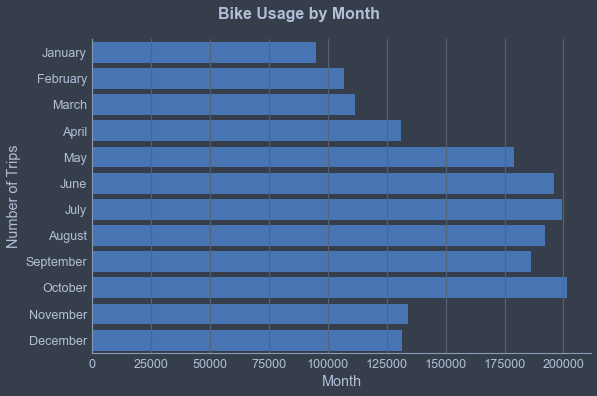

In [18]:
# Monthly usage of the Ford Go Bike system
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, y = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Trips');

graph.fig.suptitle('Bike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike Usage by Hour

>The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.

<Figure size 841.68x595.44 with 0 Axes>

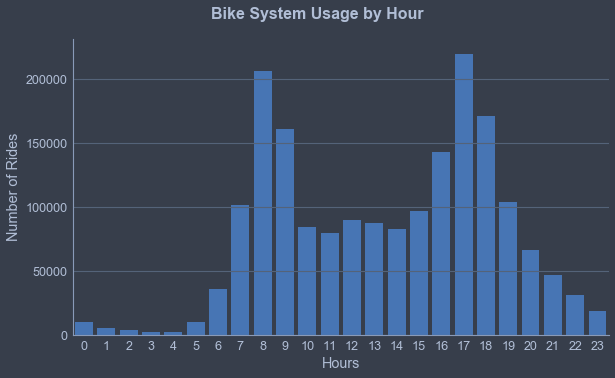

In [19]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Rides')

graph.fig.suptitle('Bike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Ford Go Bike System - Duration (Min) by User Type

The catplot and boxplot show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

<Figure size 841.68x595.44 with 0 Axes>

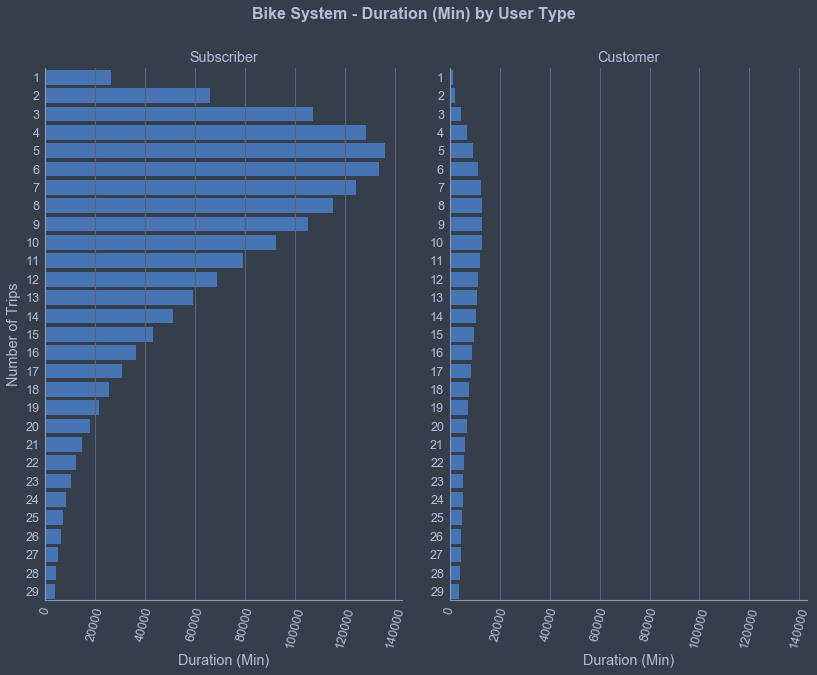

In [20]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Duration (Min)', 'Number of Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

<Figure size 841.68x595.44 with 0 Axes>

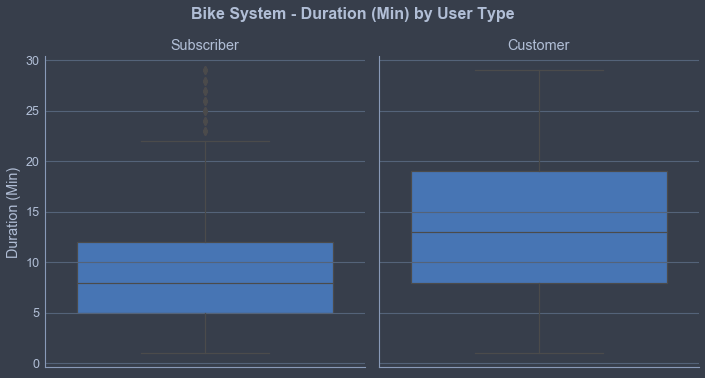

In [21]:
plt.figure(figsize=[11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color);

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike System - Start Time vs. Weekday by User Type

Customers use the bike sharing system more often on weekends, while Subscribers primarily use the bikes on weekdays.
Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.
Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

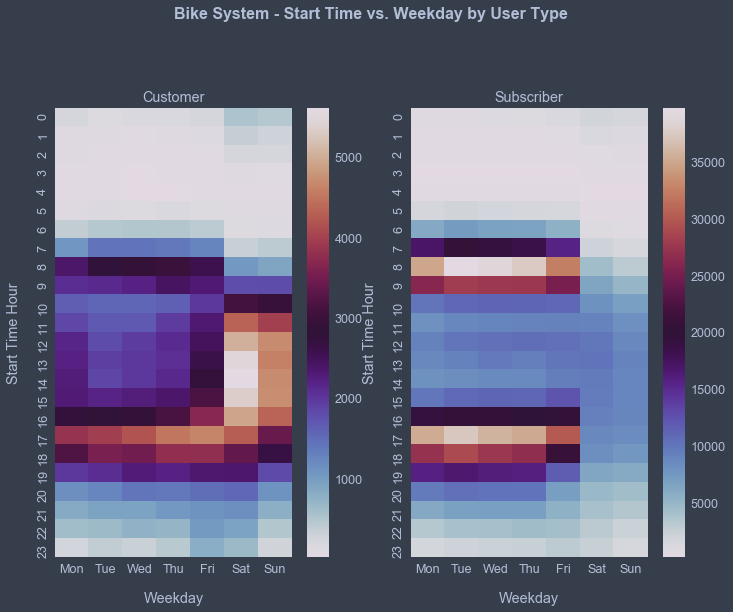

In [22]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[11.69, 8.27]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Bike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!